In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [3]:
df = pd.read_csv('datasets/snippets_v0.csv')

In [4]:
df.columns

Index(['claim_id', 'snippet_content', 'snippet_date', 'snippet_id',
       'snippet_pagenum', 'snippet_title', 'snippet_url', 'claim_content',
       'claim_date', 'claim_label', 'claim_tag', 'claim_url', 'date_number'],
      dtype='object')

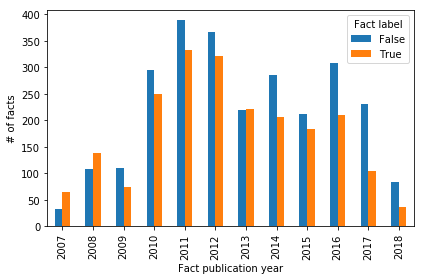

In [5]:
df_temp = df[['claim_id','claim_label','claim_date']].drop_duplicates().copy()
df_temp['claim_date'] = pd.to_datetime(df_temp['claim_date'],unit='d')

df_temp['claim_date'] = df_temp['claim_date'].dt.year

df_temp = df_temp.groupby(['claim_date','claim_label']).count().reset_index()\
.pivot(index='claim_date',columns='claim_label',values='claim_id')

df_temp.index.name = 'Fact publication year'
df_temp.columns.name = 'Fact label'

df_temp.plot.bar()
plt.ylabel('# of facts')

plt.tight_layout()

plt.savefig('00_timeline.png')

92


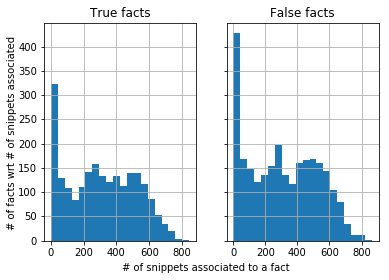

In [6]:
fig, axs = plt.subplots(1,2, sharey = True)

df_temp = df[['claim_id','snippet_id']].groupby('claim_id').count().reset_index()

print(len(df_temp[df_temp['snippet_id']==1]))

df[df['claim_label']==True][['claim_id','snippet_id']].groupby('claim_id')\
.count().reset_index()['snippet_id'].hist(bins=20, ax=axs[0])
axs[0].set_title('True facts')
#axs[0].set_xlabel('# of documents associated to a fact')
#axs[0].set_ylabel('# of facts wrt # of documents associated')
df[df['claim_label']==False][['claim_id','snippet_id']].groupby('claim_id')\
.count().reset_index()['snippet_id'].hist(bins=20, ax=axs[1])
axs[1].set_title('False facts')
#axs[1].set_xlabel('# of documents associated to a fact')
#axs[1].set_ylabel('# of facts wrt # of documents associated')

fig.text(0.5, 0.02, '# of snippets associated to a fact', ha='center')
fig.text(0.04, 0.5, '# of facts wrt # of snippets associated', va='center', rotation='vertical')

plt.savefig('00_histogram.png')

#fig.tight_layout()

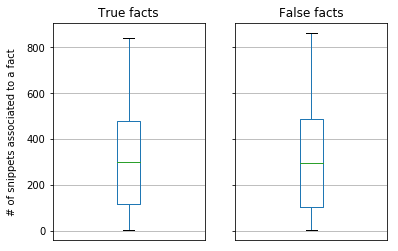

In [7]:
fig, axs = plt.subplots(1,2, sharey = True)

df[df['claim_label']==True][['claim_id','snippet_id']].groupby('claim_id')\
.count().reset_index()[['snippet_id']].boxplot(ax=axs[0])
axs[0].set_title('True facts')
axs[0].axes.get_xaxis().set_visible(False)
#axs[0].set_xlabel('')
#axs[0].set_ylabel('# of facts wrt # of documents associated')
df[df['claim_label']==False][['claim_id','snippet_id']].groupby('claim_id')\
.count().reset_index()[['snippet_id']].boxplot(ax=axs[1])
axs[1].set_title('False facts')
axs[1].axes.get_xaxis().set_visible(False)
#axs[1].set_xlabel('')
#axs[1].set_ylabel('# of facts wrt # of documents associated')

#fig.text(0.5, 0.02, '# of documents associated to a fact', ha='center')
fig.text(0.02, 0.5, '# of snippets associated to a fact', va='center', rotation='vertical')



plt.savefig('00_boxplot.png')

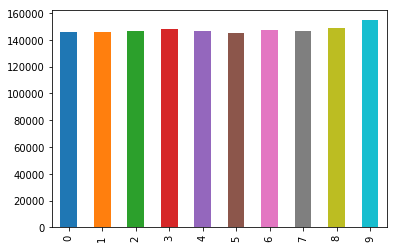

In [8]:
df['date_number'] = df['snippet_date'] - df['claim_date'] + 10 
df['date_number'].value_counts().sort_index().plot(kind='bar')

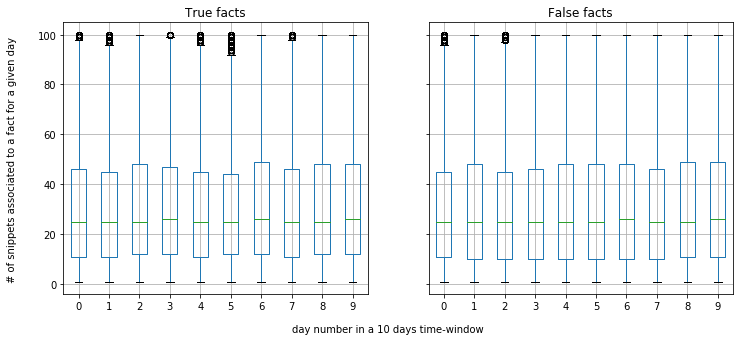

In [9]:
fig, axs = plt.subplots(1,2, sharey = True, figsize=(12,5))

df[df['claim_label']==True][['claim_id','date_number','snippet_id']].groupby(['claim_id','date_number'])\
.count().reset_index()[['claim_id','date_number','snippet_id']]\
.pivot(index='claim_id',columns='date_number', values='snippet_id').boxplot(ax=axs[0])
axs[0].set_title('True facts')

df[df['claim_label']==False][['claim_id','date_number','snippet_id']].groupby(['claim_id','date_number'])\
.count().reset_index()[['claim_id','date_number','snippet_id']]\
.pivot(index='claim_id',columns='date_number', values='snippet_id').boxplot(ax=axs[1])
axs[1].set_title('False facts')

fig.text(0.5, 0.02, 'day number in a 10 days time-window', ha='center')
fig.text(0.06, 0.5, '# of snippets associated to a fact for a given day', va='center', rotation='vertical')

plt.savefig('00_boxplots_2.png')

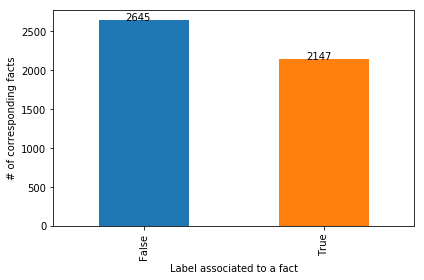

In [10]:
ax = df[['claim_id','claim_label']].drop_duplicates()['claim_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() +0.15, p.get_height() +0.04))
    
plt.xlabel('Label associated to a fact')
plt.ylabel('# of corresponding facts')

plt.tight_layout()

plt.savefig('00_fact_distribution.png')

1475332


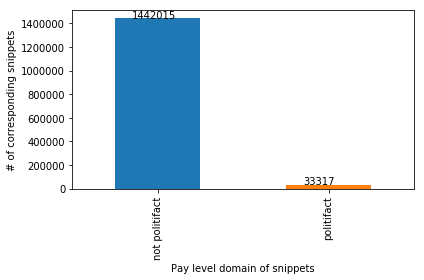

In [11]:
df_temp = df['snippet_url'].apply(lambda x: x.find('politifact.com')<0).value_counts()

df_temp.index = ['not politifact','politifact']

ax = df_temp.plot(kind='bar')
print(len(df))
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() +0.1, p.get_height() +0.1))

    
plt.xlabel('Pay level domain of snippets')
plt.ylabel('# of corresponding snippets')

plt.tight_layout()

plt.savefig('00_pld.png')

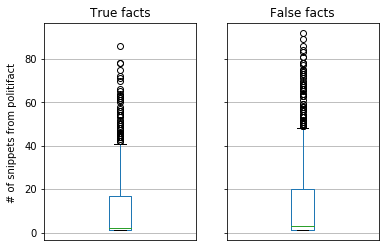

In [12]:
df_temp = df[['claim_id','snippet_url','claim_label']].copy()
df_temp['snippet_url'] = df_temp['snippet_url'].apply(lambda x: x.find('politifact.com')<0)

df_temp = df_temp[df_temp['snippet_url']==False]
#df_temp['claim_label'].value_counts().plot(kind='bar')

df_temp = df_temp.groupby(['claim_id','claim_label']).count().reset_index()

fig, axs = plt.subplots(1,2, sharey = True)

df_temp[df_temp['claim_label']==True][['snippet_url']].boxplot(ax=axs[0])
axs[0].axes.get_xaxis().set_visible(False)
axs[0].set_title('True facts')

df_temp[df_temp['claim_label']==False][['snippet_url']].boxplot(ax=axs[1])
axs[1].axes.get_xaxis().set_visible(False)
axs[1].set_title('False facts')

fig.text(0.04, 0.5, '# of snippets from politifact', va='center', rotation='vertical')

plt.savefig('00_politifact_true_false.png')

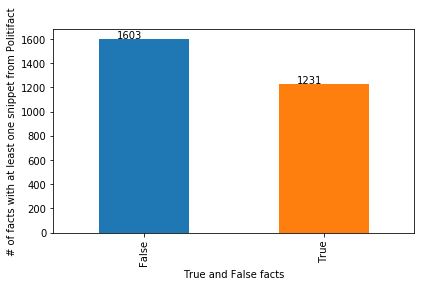

In [13]:
ax = df_temp['claim_label'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() +0.1, p.get_height() +0.1))
    
plt.xlabel('True and False facts')
plt.ylabel('# of facts with at least one snippet from Politifact')

plt.tight_layout()

plt.savefig('00_politifact_true_false_2.png')

In [14]:
df_not_politifact = df[['snippet_id','snippet_url']].copy()
df_not_politifact['snippet_url'] = df_not_politifact['snippet_url'].apply(lambda x: x.find('politifact.com')<0)
df2 = pd.merge(df,df_not_politifact[df_not_politifact['snippet_url']==True][['snippet_id']])
len(df2)

1442015

In [15]:
file = open('worthless_words.txt','r')
m_words = file.read().lower().split('|')
file.close()
print(m_words)

['for', 'when', 'me', 'them', 'not', 'they', 'because', 'are', 'or', 'do', 'see', 'so', 'all', 'even', 'more', 'have', 'who', 'than', 'well', 'with', 'be', 'think', 'way', 'a', 'you', 'to', 'what', 'will', 'say', 'one', 'want', 'come', 'now', 'go', 'him', 'she', 'other', 'an', 'which', 'into', 'first', 'has', 'that', 'people', 'his', 'your', 'year', 'most', 'this', 'same', 'by', 'two', 'like', 'the', 'no', 'there', 'work', 'give', 'we', 'out', 'as', 'time', 'our', 'new', 'about', 'these', 'their', 'but', 'at', 'on', 'my', 'use', 'soon', 'day', 'back', 'take', 'can', 'any', 'and', 'if', 'after', 'her', 'know', 'says', 'would', 'good', 'it', 'in', 'some', 'just', 'could', 'over', 'up', 'us', 'its', 'only', 'look', 'from', 'get', 'how', 'also', 'then', 'of', 'is', 'i', 'make', 'he']


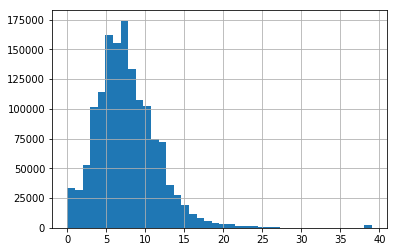

In [16]:
str_sep = '*:•/_–—\\-‐,.|‑…→]―=[~+'
def score_english(st):
    global str_sep
    st = st.lower()
    for c in str_sep:
        st.replace(c, ' ')
    lst = list(filter(lambda x: (ord(x)>=ord('a') and ord(x)<=ord('z')) or x==' ',list(st)))
    tb = ''.join(lst).split(' ')
    score = np.sum([1 if x in tb else 0 for x in m_words])
    return score

df_temp = df2[['claim_id','claim_label','snippet_id','snippet_content']].copy()
df_temp['snippet_content'] = df_temp['snippet_content'].apply(lambda x: score_english(x))
df_temp['snippet_content'].hist(bins=40)

33288


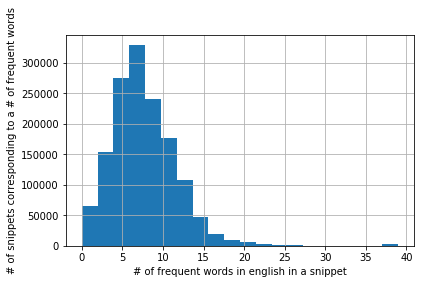

In [17]:
df_temp['snippet_content'].hist(bins=20)
plt.xlabel('# of frequent words in english in a snippet')
plt.ylabel('# of snippets corresponding to a # of frequent words')

print(len(df_temp[df_temp['snippet_content']==0]))

plt.tight_layout()

plt.savefig('00_frequent_words_en.png')

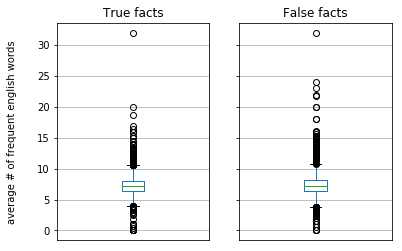

In [18]:
fig, axs = plt.subplots(1,2, sharey = True)

df_temp[df_temp['claim_label']==True].groupby(['claim_id','claim_label']).mean()\
.reset_index()[['snippet_content']].boxplot(ax = axs[0])

axs[0].axes.get_xaxis().set_visible(False)
axs[0].set_title('True facts')

df_temp[df_temp['claim_label']==False].groupby(['claim_id','claim_label']).mean()\
.reset_index()[['snippet_content']].boxplot(ax = axs[1])

axs[1].axes.get_xaxis().set_visible(False)
axs[1].set_title('False facts')

fig.text(0.01, 0.5, 'average # of frequent english words', va='center', rotation='vertical')

plt.savefig('00_frequent_words_en_true_false.png')

In [19]:
df3 = pd.merge(df2, df_temp[df_temp['snippet_content']>0][['snippet_id']])
print(len(df2))
len(df3)

1442015


1408727

Text(0.02,0.5,'# of snippets associated to a fact')

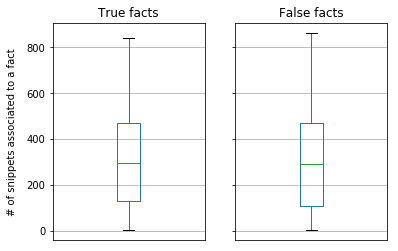

In [20]:
fig, axs = plt.subplots(1,2, sharey = True)

df3[df3['claim_label']==True][['claim_id','snippet_id']].groupby('claim_id')\
.count().reset_index()[['snippet_id']].boxplot(ax=axs[0])
axs[0].set_title('True facts')
axs[0].axes.get_xaxis().set_visible(False)
#axs[0].set_xlabel('')
#axs[0].set_ylabel('# of facts wrt # of documents associated')
df3[df3['claim_label']==False][['claim_id','snippet_id']].groupby('claim_id')\
.count().reset_index()[['snippet_id']].boxplot(ax=axs[1])
axs[1].set_title('False facts')
axs[1].axes.get_xaxis().set_visible(False)
#axs[1].set_xlabel('')
#axs[1].set_ylabel('# of facts wrt # of documents associated')

#fig.text(0.5, 0.02, '# of documents associated to a fact', ha='center')
fig.text(0.02, 0.5, '# of snippets associated to a fact', va='center', rotation='vertical')

In [21]:
df_temp = df3[['claim_id','snippet_id']].groupby('claim_id').count().reset_index()

print(len(df_temp[df_temp['snippet_id']==1]))

45


Text(0.06,0.5,'# of snippets associated to a fact for a given day')

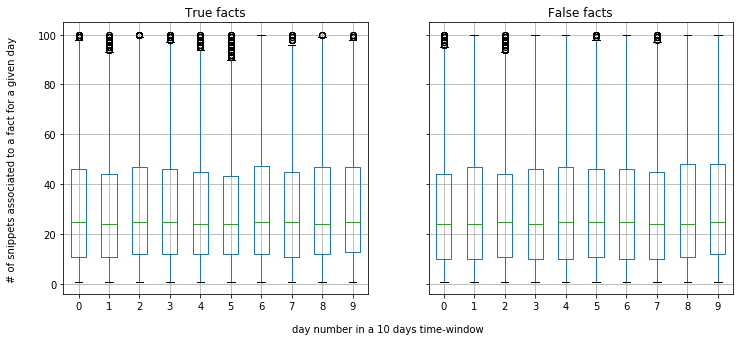

In [22]:
fig, axs = plt.subplots(1,2, sharey = True, figsize=(12,5))

df3[df3['claim_label']==True][['claim_id','date_number','snippet_id']].groupby(['claim_id','date_number'])\
.count().reset_index()[['claim_id','date_number','snippet_id']]\
.pivot(index='claim_id',columns='date_number', values='snippet_id').boxplot(ax=axs[0])
axs[0].set_title('True facts')

df3[df3['claim_label']==False][['claim_id','date_number','snippet_id']].groupby(['claim_id','date_number'])\
.count().reset_index()[['claim_id','date_number','snippet_id']]\
.pivot(index='claim_id',columns='date_number', values='snippet_id').boxplot(ax=axs[1])
axs[1].set_title('False facts')

fig.text(0.5, 0.02, 'day number in a 10 days time-window', ha='center')
fig.text(0.06, 0.5, '# of snippets associated to a fact for a given day', va='center', rotation='vertical')

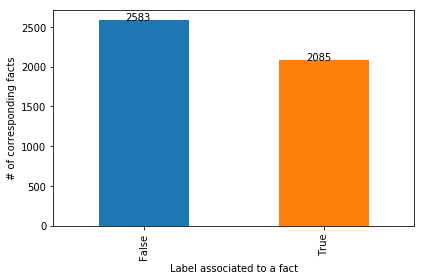

In [23]:
ax = df3[['claim_id','claim_label']].drop_duplicates()['claim_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() +0.15, p.get_height() +0.04))
    
plt.xlabel('Label associated to a fact')
plt.ylabel('# of corresponding facts')

plt.tight_layout()

In [134]:
df2.to_csv('datasets/00_snippets.csv',index=False)